回帰

## 必要なライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# 予測したいデータの読み込み
path_test_preprp = '../../../../data/processed/test_processed_23.csv'

test = pd.read_csv(path_test_preprp)

## 保存されたモデルを使って予測を行う

In [12]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_23/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [13]:
# 予測結果を出力する
print(predictions)

[-2.07215265 -0.1918184  -0.59127448 ...  1.00185409 -2.99506009
  0.09697266]


## 提出用ファイルの作成

In [17]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_23.csv", index=False)

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00, 2.0000e+00,
        2.0000e+00, 3.0000e+00, 6.0000e+00, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 4.0000e+00, 9.0000e+00, 5.0000e+00, 8.0000e+00,
        1.1000e+01, 1.1000e+01, 1.3000e+01, 7.0000e+00, 9.0000e+00,
        8.0000e+00, 1.0000e+01, 9.0000e+00, 1.3000e+01, 1.6000e+01,
        2.0000e+01, 2.2000e+01, 1.6000e+01, 1.9000e+01, 1.8000e+01,
        2.6000e+01, 3.0000e+01, 2.4000e+01, 1.9000e+01, 2.3000e+01,
        1.7000e+01, 2.4000e+01, 3.1000e+01, 3.8000e+01, 3.7000e+01,
        3.7000e+01, 3.7000e+01, 5.2000e+01, 5.7000e+01, 5.2000e+01,
        6.6000e+01, 7.6000e+01, 6.1000e+01, 7.2000e+01, 7.0000e+01,
        7.7000e+01, 9.3000e+01, 1.1100e+02, 1.4700e+02, 1.3200e+02,
        1.5100e+02, 1.7700e+02, 2.0100e+02, 2.2600e+02, 2.6500e+02,
        3.4100e+02, 3.7100e+02, 4.6200e+02, 5.5000e+02, 6.1800e+02,
        8.7100e+02, 1.0020e+03, 1.2580e+03, 1.66

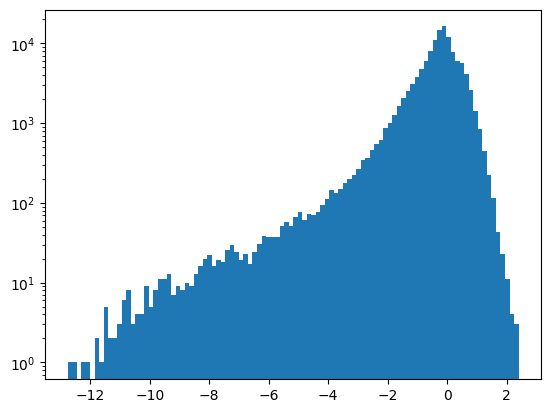

In [18]:
import matplotlib.pyplot as plt
plt.yscale('log')
plt.hist(sub_df.target, bins=100)
#plt.hist(predictions[predictions<0], bins=100)

In [19]:
sub_df

,card_id,target
0,C_ID_0ab67a22ab,-2.072153
1,C_ID_130fd0cbdd,-0.191818
2,C_ID_b709037bc5,-0.591274
3,C_ID_d27d835a9f,-0.176060
4,C_ID_2b5e3df5c2,-0.980048
...,...,...
123618,C_ID_7a239d2eda,0.800503
123619,C_ID_75ace375ae,-0.307557
123620,C_ID_21d56d950c,1.001854
123621,C_ID_6c46fc5a9d,-2.995060
